# config the workspace

In [1]:
from Lab_Equipment.Config import config 

Current Directory: h:\MPLCProject
This is a Windows system.


# load all libs

In [12]:
# Python Libs
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import copy
from IPython.display import display, clear_output
import ipywidgets
import multiprocessing
from multiprocessing import shared_memory
import time
import scipy.io

from scipy import io, integrate, linalg, signal
from scipy.io import savemat, loadmat
from scipy.fft import fft, fftfreq, fftshift,ifftshift, fft2,ifft2,rfft2,irfft2
# Defult Pploting properties 
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5,5]

#General libs
import Lab_Equipment.GeneralLibs.ComplexPlotFunction as cmplxplt

#SLM Libs
import Lab_Equipment.SLM.pyLCOS as pyLCOS
import Lab_Equipment.SLM.pyLCOS_pyQT as pyLCOS_pyQT

import Lab_Equipment.ZernikeModule.ZernikeModule as zernMod
import Lab_Equipment.SLM.GenerateSimplePhaseMasks as SimpMaskLib
import Lab_Equipment.SLM.SLM_widget as slmWidget
import Lab_Equipment.SLM.FullScreenDisplay_openCV as FullScreenLib


#Camera Libs
import Lab_Equipment.Camera.CameraObject as CamForm
import Lab_Equipment.Camera.Camera_widget as CamWidget

import Lab_Equipment.Camera.AlliedVisionCameraObj as AlliedCamForm
import Lab_Equipment.Camera.QImagCameraObj as QCamForm
import Lab_Equipment.Camera.XenicsCameraObj as XCForm
import Lab_Equipment.Camera.FLIRCameraObj as FLIRForm

#Laser Libs
import Lab_Equipment.Laser.SantecSweeptLaser as SantecSweptLaser

# digiHolo Libs
import Lab_Equipment.digHolo.digHolo_pylibs.digiholoWindowThread as digholoObjThread
import Lab_Equipment.digHolo.digHolo_pylibs.digholoObject as digholoObj

#ALignment and Calibration Libs
import Lab_Equipment.AlignmentRoutines.AlignmentRoutines_digholo as AlignRouts_digholo
import Lab_Equipment.AlignmentRoutines.PhaseCalibration_SLM_digholo as PhaseCal

#MEasurement Routine lib
import Lab_Equipment.Measurements.MeasurementRoutines as MeasureLib


# NOTE
# when debuging multiprocesses code you can put thing in the queue and the look at it from outside the thread using 
# flag =digholoThread.digholo_queue.get_nowait()
# print(flag)
import TimeTagger
# import Lab_Equipment.TimeTagger.TimeTaggerInterface as TimeTaggerMod
import Lab_Equipment.TimeTagger.TimeTaggerFunction as TimetaggerFunc
import Lab_Equipment.TimeTagger.TimeTaggerLiveWindow as TTLiveWindow




In [13]:
# This is needed to Qt stuff (I think()
# %pylab inline
# %gui qt5
%matplotlib widget
%load_ext autoreload
#Config File
%aimport Lab_Equipment.Config.config
#General libs
%aimport Lab_Equipment.GeneralLibs.ComplexPlotFunction
#SLM Libs
%aimport Lab_Equipment.SLM.pyLCOS
%aimport Lab_Equipment.SLM.FullScreenDisplay_openCV

%aimport Lab_Equipment.ZernikeModule.ZernikeModule
%aimport Lab_Equipment.SLM.GenerateSimplePhaseMasks
%aimport Lab_Equipment.SLM.SLM_widget

#Camera Libs
%aimport Lab_Equipment.Camera.CameraObject
%aimport Lab_Equipment.Camera.Camera_widget
%aimport Lab_Equipment.Camera.AlliedVisionCameraObj
%aimport Lab_Equipment.Camera.QImagCameraObj
%aimport Lab_Equipment.Camera.XenicsCameraObj
%aimport Lab_Equipment.Camera.FLIRCameraObj 
#Laser Libs
%aimport Lab_Equipment.Laser.SantecSweeptLaser 

# digiHolo Libs
%aimport Lab_Equipment.digHolo.digHolo_pylibs.digholoHeader 

%aimport Lab_Equipment.digHolo.digHolo_pylibs.digiholoWindowThread 
%aimport Lab_Equipment.digHolo.digHolo_pylibs.digholoObject

#ALignment and Calibration Libs
%aimport Lab_Equipment.AlignmentRoutines.AlignmentRoutines_digholo
%aimport Lab_Equipment.AlignmentRoutines.PhaseCalibration_SLM_digholo
%aimport Lab_Equipment.Measurements.MeasurementRoutines
%aimport  Lab_Equipment.AlignmentRoutines.AlignmentFunctions

%aimport Lab_Equipment.TimeTagger.TimeTaggerFunction 
%aimport Lab_Equipment.TimeTagger.TimeTaggerLiveWindow

%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
slm = pyLCOS.LCOS(screen=1, ActiveRGBChannels=['Red'],pixel_size=9.2e-6,RefreshTime=400*1e-3)


        Zern Coefs:
        0:  piston    ( 0,  0 )
        1:  Tiltx     (-1,  1 )
        2:  Tilty     ( 1,  1 )
        3:  Astigx    (-2,  2 )
        4:  Defocus   ( 0,  2 )
        5:  Astigy    ( 2,  2 )
        6:  Trefilx   (-3,  3 )
        7:  Comax     (-1,  3 )
        8:  Comay     ( 1,  3 )
        9:  Trefoily  ( 3,  3 )
        12:  Spherical ( 0,  4 )
        
Monitor index 1 out of range. Using primary monitor instead.
Using monitor 1: x=0, y=0, width=1024, height=768


In [26]:
mask=np.ones((1,1,127,256),dtype=complex)

In [27]:
slm.setMaskArray("Red",mask)

(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256)
(127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256) (127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)
(127, 256)


GridBox(children=(Dropdown(description='Channel', layout=Layout(width='200px'), options=(('Red SLM', 'Red'), (…

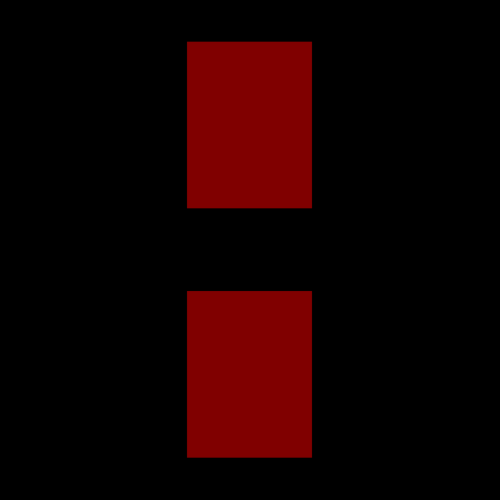

In [14]:
display(slmWidget.create_slm_widget(slm))


# Test the NealderMead funciton

In [15]:

# Define the function again
def f(x, y):
    return (x - 3)**2 + (y + 1)**2

# Make a grid
x_vals = np.linspace(-5, 10, 10000)
y_vals = np.linspace(-10, 5, 10000)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Find the minimum value and location
min_val = np.min(Z)
min_idx = np.unravel_index(np.argmin(Z), Z.shape)
min_x = X[min_idx]
min_y = Y[min_idx]

print(f"Minimum value from grid = {min_val:.4f} at x = {min_x:.2f}, y = {min_y:.2f}")

Minimum value from grid = 0.0000 at x = 3.00, y = -1.00


In [16]:
import numpy as np
from scipy.optimize import minimize

# Define the cost function
def cost_function(params):
    x, y = params
    value = (x - 3)**2 + (y + 1)**2
    print(f"Evaluating at x={x:.3f}, y={y:.3f} -> cost={value:.3f}")
    return value

def cost_function_v2(params):
    x, y = params
    value = (x - 3)**2 + (y + 1)**2
    # print(f"Evaluating at x={x:.3f}, y={y:.3f} -> cost={value:.3f}")
    return value,params

# Callback function to see the updates
def print_callback(params):
    x, y = params
    print(f"Callback: x={x:.3f}, y={y:.3f}")

# Initial guess
x0 = [0.0, 0.0]

# Define a custom simplex (triangle in 2D)
initial_simplex = np.array([
    [0.0, 0.0],        # initial point
    [1.0, 0.0],        # 1 unit step in x
    [0.0, 2.0]         # 2 unit step in y
])

# Run minimisation
result = minimize(
    cost_function,
    x0,
    method='Nelder-Mead',
    callback=print_callback,
    options={
        'disp': True,
        'initial_simplex': initial_simplex,
        'xatol': 1e-6,
        'fatol': 1e-6,
        'maxiter': 100
    }
)

# Print final result
print("\nFinal Result:")
print(result)


Evaluating at x=0.000, y=0.000 -> cost=10.000
Evaluating at x=1.000, y=0.000 -> cost=5.000
Evaluating at x=0.000, y=2.000 -> cost=18.000
Evaluating at x=1.000, y=-2.000 -> cost=5.000
Callback: x=1.000, y=0.000
Evaluating at x=2.000, y=-2.000 -> cost=2.000
Evaluating at x=3.000, y=-3.000 -> cost=4.000
Callback: x=2.000, y=-2.000
Evaluating at x=2.000, y=0.000 -> cost=2.000
Callback: x=2.000, y=-2.000
Evaluating at x=3.000, y=-2.000 -> cost=1.000
Evaluating at x=4.000, y=-3.000 -> cost=5.000
Callback: x=3.000, y=-2.000
Evaluating at x=3.000, y=-4.000 -> cost=9.000
Evaluating at x=2.250, y=-1.000 -> cost=0.562
Callback: x=2.250, y=-1.000
Evaluating at x=3.250, y=-1.000 -> cost=0.062
Evaluating at x=3.875, y=-0.500 -> cost=1.016
Callback: x=3.250, y=-1.000
Evaluating at x=2.500, y=0.000 -> cost=1.250
Evaluating at x=2.875, y=-1.500 -> cost=0.266
Callback: x=3.250, y=-1.000
Evaluating at x=3.875, y=-1.500 -> cost=1.016
Evaluating at x=2.656, y=-1.125 -> cost=0.134
Callback: x=3.250, y=-1.00

In [18]:
result.x

array([ 3.00000037, -0.99999998])

In [12]:
test=np.array([
    [0.0, 0.0],        # initial point
    [1.0, 0.0],        # 1 unit step in x
    [0.0, 2.0]         # 2 unit step in y
])
print(test.shape)

(3, 2)


In [10]:
InitalxVertex.shape

(2,)

In [10]:
import  Lab_Equipment.AlignmentRoutines.AlignmentFunctions as AlignFunc
maxAttempts=200
ErrTol=1e-20
InitalxVertex=np.asarray([0,0])
StepArray=np.asarray([1,2])
result=AlignFunc.NelderMead(StepArray,InitalxVertex,ErrTol,maxAttempts,cost_function_v2)
# Print final result
print("\nFinal Result:")
print(result)

[10.  5. 18.]
[[0. 1. 0.]
 [0. 0. 2.]]
0  Function Value=  5.0  Error Accros Values=  3.299831645537222  Verterx Value=  [1. 0.]
[ 5. 10.  2.]
1  Function Value=  2.0  Error Accros Values=  1.247219128924647  Verterx Value=  [ 2. -2.]
[2. 5. 4.]
2  Function Value=  2.0  Error Accros Values=  0.8897565210026093  Verterx Value=  [ 2. -2.]
[2.   4.   2.25]
3  Function Value=  2.0  Error Accros Values=  0.2041241452319315  Verterx Value=  [ 2. -2.]
[2.   2.25 2.5 ]
4  Function Value=  2.0  Error Accros Values=  0.10206207261596575  Verterx Value=  [ 2. -2.]
[2.    2.25  2.125]
5  Function Value=  2.0  Error Accros Values=  0.12842529172852035  Verterx Value=  [ 2. -2.]
[2.     2.125  1.8125]
6  Function Value=  1.8125  Error Accros Values=  0.17921510973005472  Verterx Value=  [ 1.75 -1.5 ]
[1.8125 2.     1.5625]
7  Function Value=  1.5625  Error Accros Values=  0.13031245836663338  Verterx Value=  [ 1.75 -1.  ]
[1.5625   1.8125   1.515625]
8  Function Value=  1.515625  Error Accros Values

In [11]:
AlignFunc.ChangeFileForStopAliginment(0)

# Connect to Camera

In [ ]:
del CamFLIR

In [ ]:
# CamXenics=XCForm.XenicsCameraObject('cam://0')
CamFLIR=FLIRForm.FLIRCameraObject()

In [ ]:
display(CamWidget.create_camera_widget(CamFLIR.CamObject))

# lanuch digholo window

In [ ]:
del digholoThread

In [ ]:
# del digholo
digholoThread=digholoObjThread.digholoWindow(CamXenics.CamObject)
# Example of Changing values in digholo and realign digholo


In [ ]:
digholoThread.digholoWindowAutoAlgin()

# make a digholo object seperate to the Window

In [ ]:
del digholo_obj

In [ ]:
digholo_obj=digholoObj.digholoObject(CamXenics.CamObject)

## Change some properties of digholo

In [ ]:
digholoThread.SetPausePlayDigholo()

# lanuch an SLM

### Make some simple masks for manual aligment purposes

### Load mask from a file

In [ ]:
del slm

In [ ]:
phase_masks=SimpMaskLib.PiFlipMasks(256,256,7,False)
# lensMaks=SimpMaskLib.LenMask(4.8e-3,808e-9,256,256,9.2e-6,False)
# Load the .mat file
FolderName="MPLC_MASK\\"
FileName="LGGroup6_8um_25mmPlane_Best_MASK"
# FileName="LGGroup6_8um_25mmPlane_Wavelength_Best_MASK"

FileName="Gauss8p641toLG3p5Azmth17_Dis50p06_bandW50_Best_MASK"


data = scipy.io.loadmat(FolderName+FileName+'.mat')

# # Extract a specific variable (replace 'variable_name' with the actual name)
MasksFromFile = data['MASKS']


slm = pyLCOS.LCOS(screen=1, ActiveRGBChannels=['Red'], pixel_size=8e-6,PhaseMask=MasksFromFile,RefreshTime=400*1e-3)
# slm = pyLCOS_pyQT.LCOS(screen=2, ActiveRGBChannels=['Red'], pixel_size=8e-6,PhaseMask=MasksFromFile,RefreshTime=200*1e-3)

# To load on a new mask set of any size just use the line below it should handle it for you 
# slm.setMaskArray("Red", phase_masks)
slm.setMaskArray("Red", (MasksFromFile))

slm.LoadMaskProperties("LGGroup6_8um_25mmPlane_Wavelength_Best_MASK")

In [ ]:
phase_masks=SimpMaskLib.PiFlipMasks(256,256,7,False)
slm.setMaskArray("Red", phase_masks)
# slm.setMaskArray("Red", (MasksFromFile))


# This gives you a live update gui for the masks. If you have run an alignment you should alway hit the update all SLM button to get the most up to date value.

In [ ]:
display(slmWidget.create_slm_widget(slm))

# Course Sweep to roughly see how many bounces there are across the SLM
### Just watch the camera live feed and see how many time the beam undergoes defraction 

In [ ]:
slm.CourseSweepAcrossSLM("Red",30)

# Phase Calibration

In [ ]:
# FramesFromPhaseCal=AlignRoutines.PhaseCalibration(slm_SPDC,"Red",CamAllied.CamObject,'y')
# FramesFromPhaseCal=AlignRoutines.PhaseCalibration(slm_SPDC,"Green",CamAllied.CamObject,'x')
FramesFromPhaseCal=PhaseCal.PhaseCalibration(slm,"Red",CamXenics.CamObject,'y',6,"H")


In [ ]:
FieldFromPhaseCal,windowString=PhaseCal.ProcessFramesFromPhaseCal(FrameBuffer=FramesFromPhaseCal,
                              digholoObj=digholo_obj, 
                              MaskNum=7,FFTRadiusIn=0.2,wavelength=1550e-9,Nx=256,Ny=256,CampixelSize=30e-6)

# FieldFromPhaseCal,windowString=PhaseCal.ProcessFramesFromPhaseCal(FramesFromPhaseCal,7,0.2,CampixelSize=CamXenics.CamObject.PixelSize)

In [ ]:
slm.saveMaskProperties("LGGroup6_8um_25mmPlane_Wavelength_Best_MASK")
# slm.saveMaskProperties("LGGroup6_8um_25mmPlane_Best_MASK")


# Alignment of Centers

In [ ]:
AlignmentObject=AlignRouts_digholo.AlginmentObj_digiholo(slmObject=slm,
                                                         CamObj=CamXenics.CamObject,
                                                         digiholoObj=digholo_obj,
                                                         MaskSize=[320,320],
                                                         PixelsCountFromCenters=100,
                                                         ApplyZernike=False,
                                                         pol='H')

In [ ]:
AlignmentObject.MaskSize=[320,320]

In [ ]:
AlignmentObject.MakeReferenceField()


In [ ]:
AlignmentObject.AvgFrameCount=30

In [ ]:
AlignmentObject.PerformCenterAlignment_GoldenSearch()

In [ ]:
RefSigPWR,RefSigPWR_log,PixelFlipStep=AlignmentObject.SweepAcrossSLM_Field(25,int(100))

In [ ]:
PropertiesToAlign = {
                "AlignCenters": False,
                "AlignPiston": True,
                "AlignTiltX": False,
                "AlignTiltY": False,
                "AlignDefocus": False,
                "AlignFirstTiltX": False,
                "AlignFirstTiltY": False,
                "AlignLastTiltX": False,
                "AlignLastTiltY": False,
                "AlignDefocusFirst": False,
                "AlignDefocusLast": False
            }
InitialStepSizes = {
                "d_Centers": 50,
                "d_Piston": 1,
                "d_TiltX": 20,
                "d_TiltY": 20,
                "d_Defocus": 5
            }

In [ ]:
AlignmentObject.MultiDimAlignmentOfSLM(maxAttempts=100, GoalMetric=digholoObj.digholoMetrics.SNRAVG,InitialStepSizes=InitialStepSizes,PropertiesToAlign=PropertiesToAlign)

# Measurement Routines

In [ ]:
MeasObj=MeasureLib.MeasurmentObj(slmObject=slm,CamObj=CamXenics.CamObject,digiholoObj=digholo_obj)

In [ ]:
digholoThread.SetPausePlayDigholo()

In [ ]:
# digholoThread.SetPausePlayDigholo()
for i in range(10000):
    Frames=MeasObj.GetBatchOfFrames()
# digholoThread.SetPausePlayDigholo()


In [ ]:
digholoThread.Set_digholoWindowProps(digholo_obj.digholoProperties)

In [ ]:
digholo_obj.loadTransformMatrix("TransformMatrix_LGGroup7.npy")

In [ ]:
digholo_obj.digholoProperties["FFTRadius"]=0.4
digholo_obj.digholoProperties["fftWindowSizeY"]=256
digholo_obj.digholoProperties["fftWindowSizeX"]=256
digholo_obj.digholoProperties["verbosity"]=0
digholo_obj.digholoProperties["resolutionMode"]=0
digholo_obj.digholoProperties["maxMG"]=7
digholo_obj.digholoProperties["basisType"]=2

digholo_obj.digholoProperties["goalIdx"]=digholoObj.digholoMetrics.IL





# Frame=CamXenics.CamObject.GetFrame(True)
coefs,metrics=digholo_obj.digHolo_AutoAlign(Frames)
Fullimage,_, WindowSting=digholo_obj.GetViewport_arr(Frames)
plt.figure(1)
plt.imshow(Fullimage)
CoefsImage,MetricsText=digholo_obj.GetCoefAndMetricsForOutput()
canvasToDispla_Coefs=digholo_obj.DisplayWindow_GraphWithText(CoefsImage,MetricsText)
# plt.imshow(canvasToDispla_Coefs)
plt.figure(2)
plt.imshow(CoefsImage)
print(MetricsText)

#update the digholo thread properties
digholoThread.Set_digholoWindowProps(digholo_obj.digholoProperties)


#just plots the fields
# Fields=digholo_obj.digHolo_GetFields()
# digholo_obj.PlotFields(0,0,Fields)

In [ ]:
plt.imshow(cmplxplt.ComplexArrayToRgb(coefs))

In [ ]:
a=coefs @ digholo_obj.TransformMat
plt.imshow(cmplxplt.ComplexArrayToRgb(a))


In [ ]:
test=digholo_obj.test[:,0::2]+1j*digholo_obj.test[:,1::2]
plt.imshow(cmplxplt.ComplexArrayToRgb(test))


In [ ]:
public: void mplcReverseOrderOMaskXCenters() {
		int MaskCountRevLoop;
		if (slmMaskCount % 2 == 0) {
			MaskCountRevLoop = int((slmMaskCount / 2) + 1);
		}
			
		else {
			MaskCountRevLoop = int(slmMaskCount / 2);
		}
		for (int polIdx = 0; polIdx < slmPolCount; polIdx++)
		{
			for (int maskLower = 0; maskLower < MaskCountRevLoop; maskLower++)
			{
				int maskUpper = int(slmMaskCount - 1) - maskLower;
				float cxUpper_temp = ZERNIKE_CX[maskUpper][polIdx];
				float cxLower_temp = ZERNIKE_CX[maskLower][polIdx];
				float cyUpper_temp = ZERNIKE_CY[maskUpper][polIdx];
				float cyLower_temp = ZERNIKE_CY[maskLower][polIdx];

				ZERNIKE_CX[maskUpper][polIdx] = cxLower_temp;
				ZERNIKE_CX[maskLower][polIdx] = cxUpper_temp;
				ZERNIKE_CY[maskUpper][polIdx] = cyLower_temp;
				ZERNIKE_CY[maskLower][polIdx] = cyUpper_temp;
			}
		}

	}

In [ ]:
public:void mplcGlobalShiftSpacing(int pivotIdx, int polIdx, float dx, float dy, float dx2, float dy2, unsigned char tiltLock)
	{
		//int polIdx = mplcPolIdx;
		if (pivotIdx >= slmMaskCount)
		{
			pivotIdx = slmMaskCount - 1;
		}
		if (pivotIdx < 0)
		{
			pivotIdx = 0;
		}

		float pivotX = ZERNIKE_CX[pivotIdx][polIdx];
		float pivotY = ZERNIKE_CY[pivotIdx][polIdx];

		for (int maskIdx = 0; maskIdx < slmMaskCount; maskIdx++)
		{

			float X = ZERNIKE_CX[maskIdx][polIdx];
			float Y = ZERNIKE_CY[maskIdx][polIdx];

			float dMask = maskIdx - pivotIdx;
			float dMask2 = dMask * dMask;
			if (dMask < 0)
			{
				dMask2 = -dMask2;
			}
			X = X + dMask * dx + dMask2 * dx2;
			Y = Y + dMask * dy + dMask2 * dy2;
			ZERNIKE_CX[maskIdx][polIdx] = X;
			ZERNIKE_CY[maskIdx][polIdx] = Y;
		}

		if (tiltLock)
		{

			//Adjust the tilt of the mask to compensate for the new spacings
			float mirrorMaskSpacing = 12.5e-3;
			float pixelSize = 9.2e-6;
			float k0 = (2 * pi) / 1565e-9;
			float DX = pixelSize * dx;
			float DY = pixelSize * dy;
			float dTHx = acml_atan2f(DX, 2 * mirrorMaskSpacing);
			float dTHy = acml_atan2f(DY, 2 * mirrorMaskSpacing);
			float dkx = k0 * acml_asinf(dTHx);
			float dky = k0 * acml_asinf(dTHy);

			float dTiltX = systemSettingsClearAperture * 1e-3 * dkx / (2 * pi);
			float dTiltY = systemSettingsClearAperture * 1e-3 * dky / (2 * pi);

			int polFlip = 2 * (polIdx == 0) - 1;

			int maskIdx = 0;
			ZERNIKE_COEF[maskIdx][polIdx][TILTX] -= dTiltX;
			ZERNIKE_COEF[maskIdx][polIdx][TILTY] += polFlip * dTiltY;

			maskIdx = slmMaskCount - 1;
			ZERNIKE_COEF[maskIdx][polIdx][TILTX] += dTiltX;
			ZERNIKE_COEF[maskIdx][polIdx][TILTY] -= polFlip * dTiltY;
		}
	}